**Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.**


Min-Max scaling, also known as feature scaling or normalization, is a data preprocessing technique used in machine learning to rescale numeric features of a dataset to a specific range, typically between 0 and 1. The goal of Min-Max scaling is to ensure that all features have the same scale, preventing certain features from dominating others during the training of machine learning models.

In [2]:
# Example
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
scaler = MinMaxScaler()

In [5]:
scaled_total_bill = scaler.fit_transform(df[['total_bill']])
df['scaled_total_bill'] = scaled_total_bill
df.head()

,total_bill,tip,sex,smoker,day,time,size,scaled_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775


**Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.**

The Unit Vector technique, also known as vector normalization or unit normalization, is a feature scaling method used to rescale the values of a feature such that they have a magnitude of 1. This technique is primarily used in the context of vector data, where each data point represents a vector in a multi-dimensional space. Unit Vector scaling doesn't alter the relative relationships between the values within the feature but ensures that the vector's magnitude (length) is equal to 1. Unit Vector technique differs from Min-Max Scaling in the following ways:-  
1) Min-Max scaling scales feature values to a specific range, typically between 0 and 1. In contrast, Unit Vector scaling scales feature values such that the magnitude of the resulting vector is 1.  

2) Unit Vector scaling explicitly preserves the magnitude of the original vectors. This can be useful when you want to retain the direction or orientation of vectors while ensuring they all have the same length. Min-Max scaling doesn't preserve the magnitude of the vectors; it only scales values to a specific range.  

3) Min-Max scaling is commonly used when you want to bring all features to a common scale to avoid features with large values dominating those with smaller values, which is important for certain machine learning algorithms. Unit Vector scaling, on the other hand, is more suitable for scenarios where the direction or relative orientation of vectors matters.

**Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.**

Principal Component Analysis (PCA) is a widely used dimensionality reduction technique in the field of machine learning and statistics. Its primary goal is to reduce the dimensionality of a dataset while preserving as much of the important information (variance) as possible. PCA achieves this by transforming the original features into a new set of uncorrelated variables called principal components. The PCA works as follows:-  
1)  Before applying PCA, it's common practice to center the data by subtracting the mean of each feature from the corresponding feature values. Centering ensures that the first principal component passes through the origin (0,0) in the new feature space.  

2) Next, PCA calculates the covariance matrix of the centered data. The covariance matrix quantifies the relationships between the different features. It provides information about how features vary together.  

3) PCA then computes the eigenvectors and corresponding eigenvalues of the covariance matrix. Each eigenvector represents a principal component, and each eigenvalue represents the amount of variance explained by that component.  

4) The principal components are ordered by the magnitude of their corresponding eigenvalues, with the first component explaining the most variance, the second component explaining the second most, and so on. Typically, you select a subset of the top-ranked principal components that collectively explain a high percentage (e.g., 95%) of the total variance. This subset is used for dimensionality reduction.  

5) Finally, you transform the original data into the new feature space defined by the selected principal components. This transformation involves projecting the data points onto the principal components. The result is a reduced-dimensional representation of the data.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [7]:
np.random.seed(0)
X = np.random.randn(100,2)
X[:,1] = 2 * X[:,0] + np.random.randn(100)

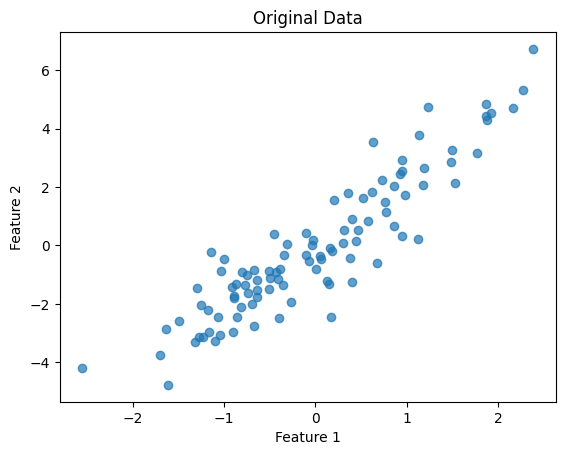

In [8]:
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [9]:
# Applying PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

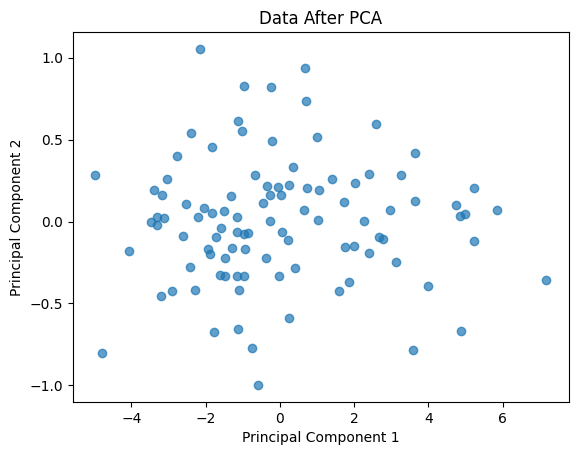

In [10]:
# Plotting the data after applying PCA
plt.scatter(x_pca[:,0],x_pca[:,1],alpha=0.7)
plt.title("Data After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [11]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.97807067 0.02192933]


**Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.**

PCA (Principal Component Analysis) can be used as a feature extraction technique, and it is closely related to the process of feature extraction in machine learning. The relationship between PCA and feature extraction lies in the fact that PCA transforms the original features of a dataset into a new set of features (the principal components) that capture the most important information or patterns in the data. These principal components can be considered as new features, and they can be used for various machine learning tasks, effectively replacing or representing the original features. PCA can be used for feature extraction in the following way:-  
1)  PCA reduces the dimensionality of the dataset by selecting a subset of the principal components while retaining most of the variance in the data. These selected principal components can be thought of as the extracted features.  

2) PCA ensures that the selected principal components are uncorrelated (orthogonal) to each other. This property can be beneficial for many machine learning algorithms that assume independence or reduced multicollinearity between features.  

3) PCA ranks the principal components by the amount of variance they explain. By selecting the top-ranked components, you retain the most important information in the data, effectively extracting the most valuable features.

In [12]:
# Example
import numpy as np
from sklearn.decomposition import PCA

In [13]:
np.random.seed(0)
X = np.random.randn(100, 3)
X[:, 2] = 2 * X[:, 0] + np.random.randn(100) 

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [15]:
print("Original Data Shape:", X.shape)
print("Data After PCA (Feature Extraction) Shape:", X_pca.shape)

Original Data Shape: (100, 3)
Data After PCA (Feature Extraction) Shape: (100, 2)


In [16]:
# Variance retained by each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.84008743 0.13750719]


**Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.**

1) First, we need to have a clear understanding of your dataset and the specific features we want to preprocess.  

2) Import the necessary libraries, such as Pandas for data manipulation and Scikit-Learn for Min-Max scaling.  

3) The we load our dataset into a Pandas DataFrame and make sure it's in a format suitable for scaling. We may need to handle missing values, categorical variables, and other data preprocessing steps before applying Min-Max scaling.  

4) Then we identify the numeric features that we want to scale. In this case, it appears that 'price' and 'delivery time' are numeric features that can benefit from Min-Max scaling.  

5) Create an instance of the MinMaxScaler from Scikit-Learn and use it to scale the selected features. Min-Max scaling will transform the values of these features to a specified range, typically between 0 and 1.  

6)  After scaling, we check the minimum and maximum values of the scaled features to confirm that they fall within the [0, 1] range.  

7) After following the above processes, we can use our preprocessed data to nuild the recommendation system.

**Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.**

1) We start by understanding our dataset, which includes features like company financial data and market trends. It's important to have domain knowledge about the financial markets to make informed decisions during PCA.  

2) Then we import the necessary libararies such as Pandas for data manipulation, Scikit-Learn for PCA, and any other libraries that we need for to work on our machine learning model.

3) Load our dataset into a Pandas DataFrame and preprocess it. This may include handling missing values, encoding categorical features, and ensuring that the data is in a suitable format for PCA.  

4) We identify the features that we want to include in the PCA. We select only the numeric features relevant to our prediction task.  

5) Standardize the data before applying PCA to ensure that features with different scales do not dominate the results.  

6) Create an instance of the PCA class and specify the number of components that we want to retain based on our desired level of dimensionality reduction.  

7) Examine the explained variance ratio to understand how much variance each principal component retains. This information helps us to decide the appropriate number of components to keep.  

8) At last, train our machine learning model according to the preprocessed data.

**Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.**

In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [10]:
min_max = MinMaxScaler(feature_range=(-1,1))

In [11]:
data = np.array([1,5,10,15,20])

In [12]:
data = data.reshape(-1,1)

In [13]:
min_max.fit_transform(data)

array([[-1.        ],
       [-0.57894737],
       [-0.05263158],
       [ 0.47368421],
       [ 1.        ]])

**Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?**

1) One common approach is to examine the explained variance artio of each principal component. The explained variance ratio tells us the proportion of the total variance in the data that is explained by each principal component. We typically want to retain enough principal components to capture a high percentage of the total variance. A common threshold is to retain components that collectively explain at least 95% of the variance. We can calculate this cumulative explained variance by summing the explained variance ratios as we move through the components in descending order.  

2) The number of principal components we choose to retain may also depend on the requirements of our specific application. If we are building a predictive model, we might perform cross-validation experiments with different numbers of components to see which one gives the best model performance. In other cases, we might prioritize interpretability and choose a smaller number of components that still capture meaningful patterns in the data.  

3) There is a trade-off between dimensionality reduction and information loss. Retaining more components allows us to capture more fine-grained details from the original data but may result in higher dimensionality. Conversely, retaining fewer components simplifies the dataset but may lead to some loss of information.  

4)  If visualization is an important aspect of our analysis, we might choose a small number of components that can be easily plotted in 2D or 3D for data exploration and interpretation.  

5) Domain expertise should also be taken into consideration. Sometimes, domain knowledge can guide our decision on the number of components to retain. Certain domains may have specific patterns or relationships that you want to capture in your components.  

6) Retaining more components will require more computational resources, both for PCA and subsequent analysis. If you have limited computational resources, you might choose a smaller number of components.  

7) We can perform incremental testing by retaining different numbers of components and evaluating their impact on model performance.